#### import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np
import os as os

from neurokit2.misc import NeuroKitWarning
from neurokit2.signal.signal_rate import _signal_rate_plot
from neurokit2.ecg.ecg_peaks import _ecg_peaks_plot
from neurokit2.ecg.ecg_segment import ecg_segment
from opensignalsreader import OpenSignalsReader

In [7]:
# open the .txt file 
filename = '/Users/luca/Downloads/TeamMessung/sourcedata/sub-02_long.txt'
with open(filename) as f:
    for i, line in enumerate(f):
        print(line)
        if i >= 15:  # View the first 5 lines
            break

# OpenSignals Text File Format. Version 1

# {"84:BA:20:AE:BC:EC": {"position": 0, "device": "bitalino_rev", "device name": "84:BA:20:AE:BC:EC", "device connection": "BTH84:BA:20:AE:BC:EC", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2024-12-18", "time": "10:48:51.26", "channels": [1, 2], "sensor": ["ECGBIT", "EDABITREV"], "label": ["A1", "A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2"], "special": [{}, {}], "digital IO": [0, 0, 1, 1]}}

# EndOfHeader

0	0	0	0	0	587	203	

1	0	0	1	1	589	203	

2	0	0	1	1	590	203	

3	0	0	1	1	593	203	

4	0	0	1	1	597	203	

5	0	0	1	1	600	203	

6	0	0	1	1	604	203	

7	0	0	1	1	607	202	

8	0	0	1	1	612	203	

9	0	0	1	1	615	203	

10	0	0	1	1	619	203	

11	0	0	1	1	623	203	

12	0	0	1	1	627	203	



In [9]:
# Open and read the file
with open(filename) as f:
    lines = f.readlines()

# Process header information and data separately
header_info = []
data_rows = []

# Extract header lines (lines starting with '#')
for line in lines:
    if line.startswith('#'):
        header_info.append(line.strip())
    else:
        # Process actual data lines (numbers)
        data_rows.append(line.strip().split())

# Prepare data for tabular display using pandas
# Convert data rows into a DataFrame
df = pd.DataFrame(data_rows)

# Set column names based on the header
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2"]
df.columns = columns

# Display the DataFrame as a table
print(df)

        nSeq I1 I2 O1 O2   A1   A2
0          0  0  0  0  0  587  203
1          1  0  0  1  1  589  203
2          2  0  0  1  1  590  203
3          3  0  0  1  1  593  203
4          4  0  0  1  1  597  203
...      ... .. .. .. ..  ...  ...
1894645    5  0  0  1  1  550  148
1894646    6  0  0  1  1  548  148
1894647    7  0  0  1  1  546  148
1894648    8  0  0  1  1  545  148
1894649    9  0  0  1  1  545  148

[1894650 rows x 7 columns]


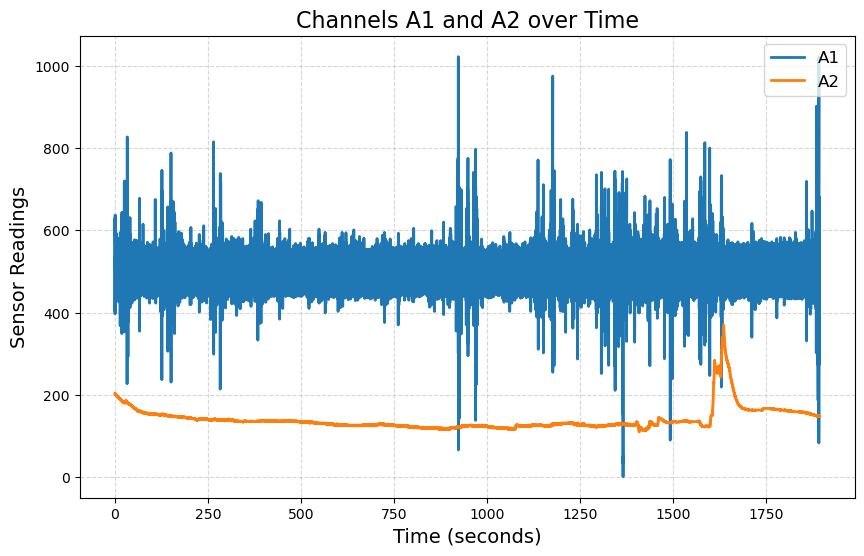

In [10]:
# Calculate time in seconds (each sample is 1 ms apart, so Time = index / 1000)
sampling_rate = 1000  # Samples per second
df['Time'] = df.index / sampling_rate

# Slice the first 10 seconds = 10000 samples of data
df_subset = df.head(5000000)

# Convert 'A1' and 'A2' columns to numeric, coercing any errors (e.g., strings) to NaN using .loc
df_subset.loc[:, 'A1'] = pd.to_numeric(df_subset['A1'], errors='coerce')
df_subset.loc[:, 'A2'] = pd.to_numeric(df_subset['A2'], errors='coerce')

# Now plot the data with A1 and A2 as numeric values
plt.figure(figsize=(10, 6))

# Plot with colors of your choice
plt.plot(df_subset['Time'], df_subset['A1'], label="A1", color='#1f77b4', linewidth=2)
plt.plot(df_subset['Time'], df_subset['A2'], label="A2", color='#ff7f0e', linewidth=2)

# Add labels and title
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Sensor Readings", fontsize=14)
plt.title("Channels A1 and A2 over Time", fontsize=16)

# Add legend and grid
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

In [37]:
## Convert the digital signal using transfer functions

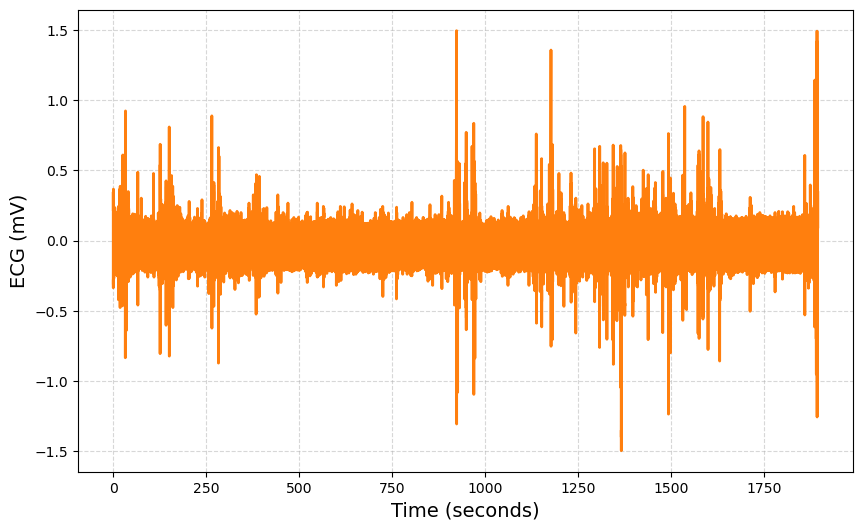

In [13]:
# ADC: Digital values of the ECG signal
ecg_digital = df_subset['A1']

# Sampling resolution of the signal
sampling_resolution = 10

# VCC: the sensor's operating voltage of 3V
vcc = 3.3

# Gecg: the sensor's gain
gain = 1100

# Convert ECG signal into mV
ecg_converted = (ecg_digital /(2 ** sampling_resolution) - 0.5) * vcc / gain * 1000 

# Now plot the converted ECG data 
plt.figure(figsize=(10, 6))
plt.plot(df_subset['Time'], ecg_converted, label="ECG", color='#ff7f0e', linewidth=2)
plt.ylabel("ECG (mV)", fontsize=14) 
plt.xlabel("Time (seconds)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)